In [ ]:
# 参考： https://bigdata-tools.com/arima-sarima-model/

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sample = 100

In [3]:
def one_dimensional_ma(c, theta, wn_scale):
    wn = np.random.normal(loc=0, scale=wn_scale, size=sample+1)
    y = np.zeros(sample+1)

    for i in range(sample):
        y[i+1] = c + theta * wn[i] + wn[i+1]

    fig = plt.figure(figsize=(7, 5))

    fig.suptitle(f"1-d MA Model (c = {c}, θ = {theta}, ε = -{wn_scale} ~ {wn_scale})")
    ax = fig.add_subplot(111)
    ax.plot([int(i) for i in range(0, sample+1)],y)
    ax.set_xlim([0, 100])
    ax.set_ylim([-5, 5])
    plt.show()

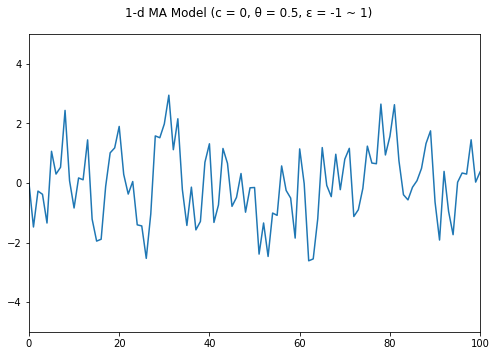

In [5]:
one_dimensional_ma(c=0, theta=0.5, wn_scale=1)
# thena
# 符号が負だとギザギザしており、符号が正だと滑らか

In [6]:
def one_dimensional_ar(c, phi, wn_scale):
    wn = np.random.normal(loc=0, scale=wn_scale, size=sample+1)
    y = np.zeros(sample+1)
    
    for i in range(sample):
        y[i+1] = c + phi * y[i] + wn[i]

    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111)
    ax.set_title(f"1-d AR Model (c = {c},  Φ= {phi}, ε = -{wn_scale} ~ {wn_scale})")
    ax.plot([int(i) for i in range(0, sample+1)],y)
    ax.set_xlim([0, 100])
    ax.set_ylim([-20, 20])
    plt.show()

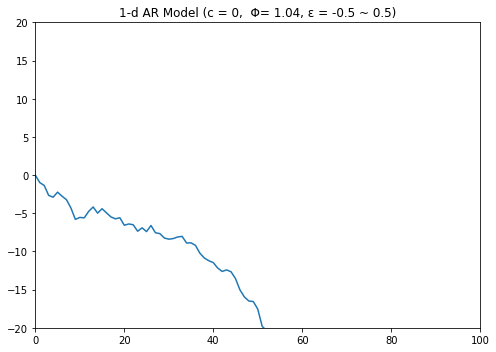

In [7]:
one_dimensional_ar(c=0, phi=1.04, wn_scale=0.5)
# abs(phi) > 1 の時、非定常過程となる

In [8]:
def one_one_dimensional_arma(c, phi, theta, wn_scale):
    wn = np.random.normal(loc=0, scale=wn_scale, size=sample+1)
    y = np.zeros(sample+1)

    for k in range(sample):
        y[k+1] = c + phi * y[k] + wn[k+1] + theta * wn[k]
   
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111)
    ax.set_title(f"1-1-d ARMA Model (c= {c}, Φ= {phi}, θ={theta}, ε = -{wn_scale} ~ {wn_scale})")
    ax.plot([int(i) for i in range(0, sample + 1)], y)
    ax.set_xlim([0, 100])
    ax.set_ylim([-5, 5])
    plt.show()
    return y

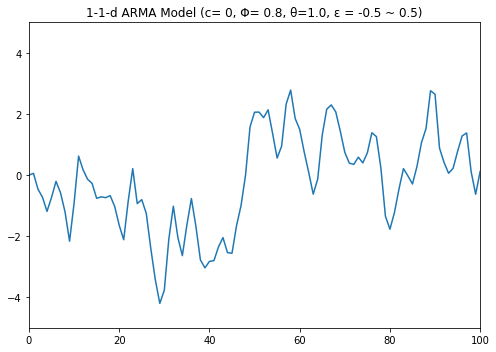

In [9]:
y = one_one_dimensional_arma(c=0, phi=0.8, theta=1.0, wn_scale=0.5)
# abs(phi) > 1 の時、ARモデルと同様に非定常過程となる

In [10]:
#パラメータの予測
#次数の推定

# statsmodel 0.12.0
import statsmodels.api as sm

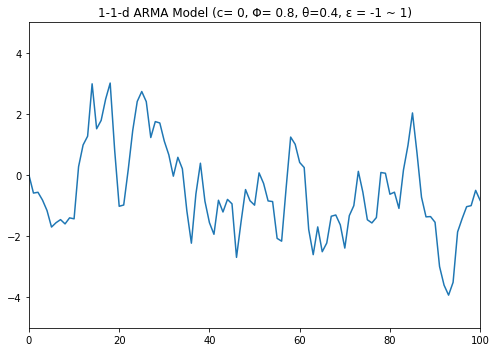

{'aic':             0           1           2
0  366.905695  285.666359  264.409171
1  259.961549  251.617089  253.588764
2  253.398533  253.580770  254.810037, 'aic_min_order': (1, 1)}


In [11]:
y = one_one_dimensional_arma(c=0, phi=0.8, theta=0.4, wn_scale=1)
print(sm.tsa.arma_order_select_ic(y, max_ar=2, max_ma=2, ic='aic'))

In [12]:
# ARMAモデルの作成と推定

model = sm.tsa.ARMA(y, order=(1,1))
result = model.fit()

print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  101
Model:                     ARMA(1, 1)   Log Likelihood                -121.809
Method:                       css-mle   S.D. of innovations              0.803
Date:                Fri, 26 Nov 2021   AIC                            251.617
Time:                        22:50:48   BIC                            262.078
Sample:                             0   HQIC                           255.852
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5213      0.348     -1.498      0.134      -1.203       0.161
ar.L1.y        0.6856      0.084      8.124      0.000       0.520       0.851
ma.L1.y        0.4020      0.113      3.550      0.0

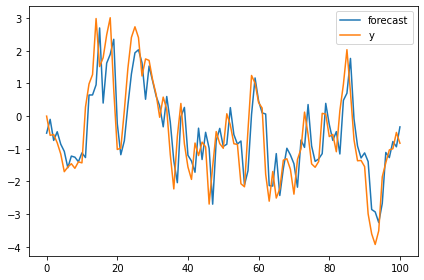

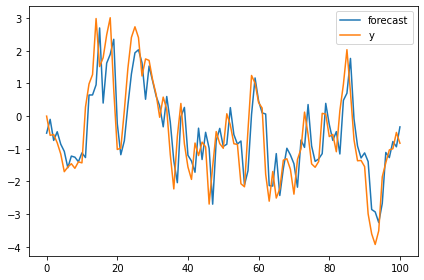

In [13]:
result.plot_predict()
# 定常過程に対してARMA modelは精度良く推定できている

In [14]:
def one_one_one_dimensional_arima(c, phi, theta, wn_scale):
    wn = np.random.normal(loc=0, scale=wn_scale, size=sample+1)
    y = np.zeros(sample+1)
    delta_y = np.zeros(sample+1)

    for k in range(sample):
        y[k+1] = c + phi * y[k] + wn[k+1] + theta*wn[k]
        delta_y[k+1] = y[k+1] - y[k]

    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(f"1-1-1 d ARIMA Model (c={c}, Φ={phi}, θ={theta}, ε= -{wn_scale} ~ {wn_scale})")
    ax.plot([int(i) for i in range(0, sample+1)], delta_y)
    ax.set_xlim([0, 100])
    ax.set_ylim([-5, 5])

    plt.show()
    return y, delta_y

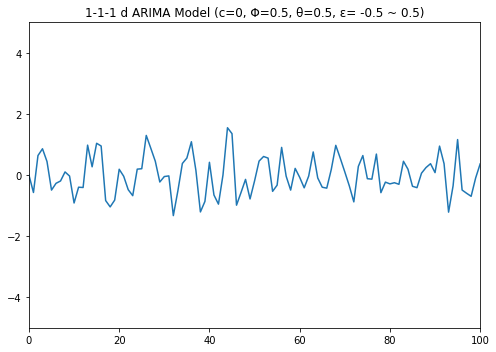

In [15]:
y, delta_y = one_one_one_dimensional_arima(c=0, phi=0.5, theta=0.5, wn_scale=0.5)

In [19]:
for i in range(2): #0次と1次の和分過程で探索
    delta_y = np.diff(y, n=i)
    resdiff = sm.tsa.arma_order_select_ic(delta_y, ic="aic", trend="nc")
    print(resdiff)

{'aic':             0           1           2
0         NaN  168.719350  150.917212
1  179.085881  152.493126  151.998216
2  153.999951  151.590274  152.845849
3  153.526979  153.520712  154.783987
4  151.818848  153.710088  155.633169, 'aic_min_order': (0, 2)}
{'aic':             0           1           2
0         NaN  176.907651  174.400668
1  186.890169  177.505934  156.258576
2  169.996621  158.352900  155.688317
3  171.934096  157.606345  157.653997
4  170.509336  156.187438  158.116758, 'aic_min_order': (2, 2)}


In [20]:
from statsmodels.tsa.arima_model import ARIMA

arima_1_1_1 = ARIMA(y, order=(1, 1, 1)).fit(dist=False)
arima_1_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -85.748
Method:                       css-mle   S.D. of innovations              0.570
Date:                Fri, 26 Nov 2021   AIC                            179.495
Time:                        22:51:28   BIC                            189.916
Sample:                             1   HQIC                           183.713
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0081      0.078     -0.104      0.917      -0.161       0.145
ar.L1.D.y     -0.1980      0.171     -1.159      0.247      -0.533       0.137
ma.L1.D.y      0.6412      0.127      5.032      0.000       0.391       0.891
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.0512           +0.0000j            5.0512            0.5000
MA.1           -1.5596           +0.0000j            1.5596            0.5000
-----------------------------------------------------------------------------
"""